In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from matplotlib import font_manager

font_dir = ['ds-aclu-police-budget-analysis/fall22-team-1/GTAmerica_Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# font_dir = ['ds-aclu-police-budget-analysis/fall22-team-1/GTAmerica_Font']
# for font in font_manager.findSystemFonts(font_dir):
#     font_manager.fontManager.addfont(font)
    
plt.rcParams['font.family'] = 'GT America'

In [3]:
mpl.rcParams['figure.figsize'] = 15, 10
plt.rcParams.update({'font.size': 16})

In [4]:
# Paths
op_budget_path = "data/fy23-adopted-operating-budget.csv"
earnings_20_path = "data/city-of-boston-calendar-year-2020-earnings.csv"
earnings_21_path = "data/employee-earnings-report-2021.csv"

# Read CSVs
e_20_df = pd.read_csv(earnings_20_path, encoding='ISO-8859-1')
e_21_df = pd.read_csv(earnings_21_path, encoding='ISO-8859-1')
op_budget_df = pd.read_csv(op_budget_path)

# Fix the Columns
e_20_df.columns = [c.strip() for c in e_20_df.columns]
e_21_df.columns = [c.strip() for c in e_21_df.columns]


In [5]:
# Handle the NaNs and negative numbers
import string

def remove_punc(text, replace_with=""):
    punc = string.punctuation.replace(".", "").replace("-","")
    text = text.strip()
    for p in punc:
        text = text.replace(p, replace_with)
        
    return text

def currency2num(x):
    series = []
    for i in x:
        if isinstance(i, str):
            series.append(max(float(remove_punc(i)), 0.0))
        else:
            series.append(i)
    return pd.Series(series)
    
cols_of_interest = ["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL", "QUINN_EDUCATION_INCENTIVE", "TOTAL_GROSS"]
cols_of_interest_20 = ["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL", "QUINN / EDUCATION INCENTIVE", "TOTAL EARNINGS"]

# Rename 2020 Columns (for Uniformity)
col_rename = dict(zip(cols_of_interest_20, cols_of_interest))
e_20_df.rename(columns=col_rename, inplace=True)

e_20_df[cols_of_interest] = e_20_df[cols_of_interest].fillna(0).apply(currency2num, axis=1)
e_21_df[cols_of_interest] = e_21_df[cols_of_interest].fillna(0).apply(currency2num, axis=1)

In [6]:
# Filtering to the Boston Police Department
e_21_df_bpd = e_21_df[e_21_df.DEPARTMENT_NAME == "Boston Police Department"]
e_20_df_bpd = e_20_df[e_20_df.DEPARTMENT_NAME == "Boston Police Department"]

/var/folders/m9/643rgy_12_78_r60rjbsns8c0000gn/T/ipykernel_37414/1985752210.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0', '$10,000,000', '$20,000,000', '$30,000,000', '$40,000,000', '$50,000,000', '$60,000,000', '$70,000,000', '$80,000,000'], fontsize = 12)
findfont: Font family ['GT America'] not found. Falling back to DejaVu Sans.
findfont: Font family ['GT America'] not found. Falling back to DejaVu Sans.
findfont: Font family ['GT America'] not found. Falling back to DejaVu Sans.


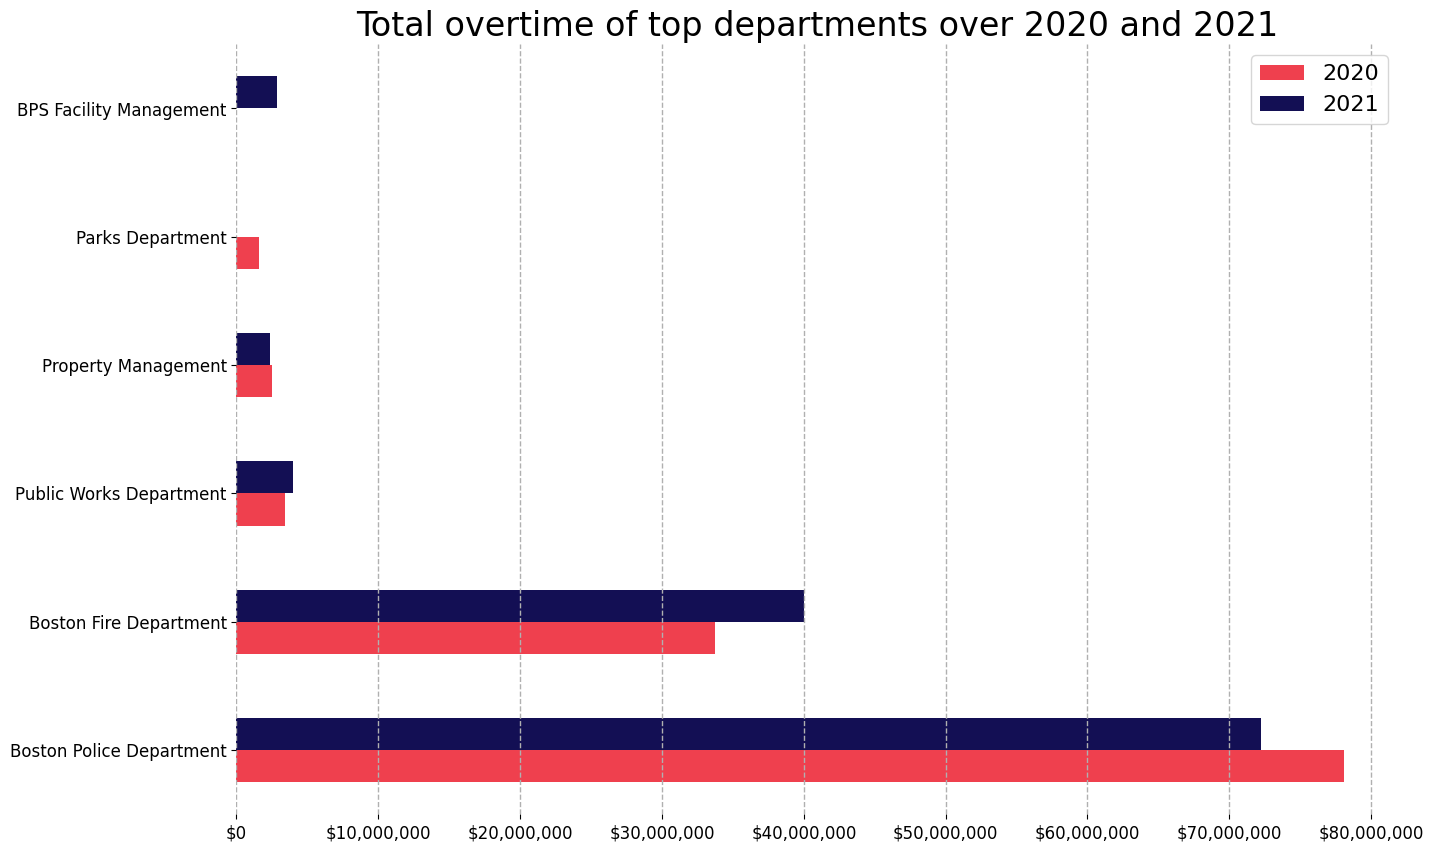

In [7]:
# 9. Total Overtime of Top Departments over time

n = 5

ot_df = pd.DataFrame(
    [
        e_20_df.groupby("DEPARTMENT_NAME").sum().sort_values(by="OVERTIME", ascending=False)[:n].OVERTIME,
        e_21_df.groupby("DEPARTMENT_NAME").sum().sort_values(by="OVERTIME", ascending=False)[:n].OVERTIME
    ],
    index=["2020", "2021"]
).transpose()

ax = ot_df.plot.barh(color=['#ef404e', '#130F54'])
ax.grid(axis='x', linestyle='--')
ax.set_xticklabels(['$0', '$10,000,000', '$20,000,000', '$30,000,000', '$40,000,000', '$50,000,000', '$60,000,000', '$70,000,000', '$80,000,000'], fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_label_text("")
plt.grid(False)
plt.title("Total overtime of top departments over 2020 and 2021", fontsize = 24)
# plt.xlabel("Total Overtime Pay (in 10 Million USD)")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'x', linewidth = 1)
# plt.ylabel(fontsize = 16)
# plt.xlabel(fontsize = 16)
plt.show()

findfont: Font family ['GT America'] not found. Falling back to DejaVu Sans.


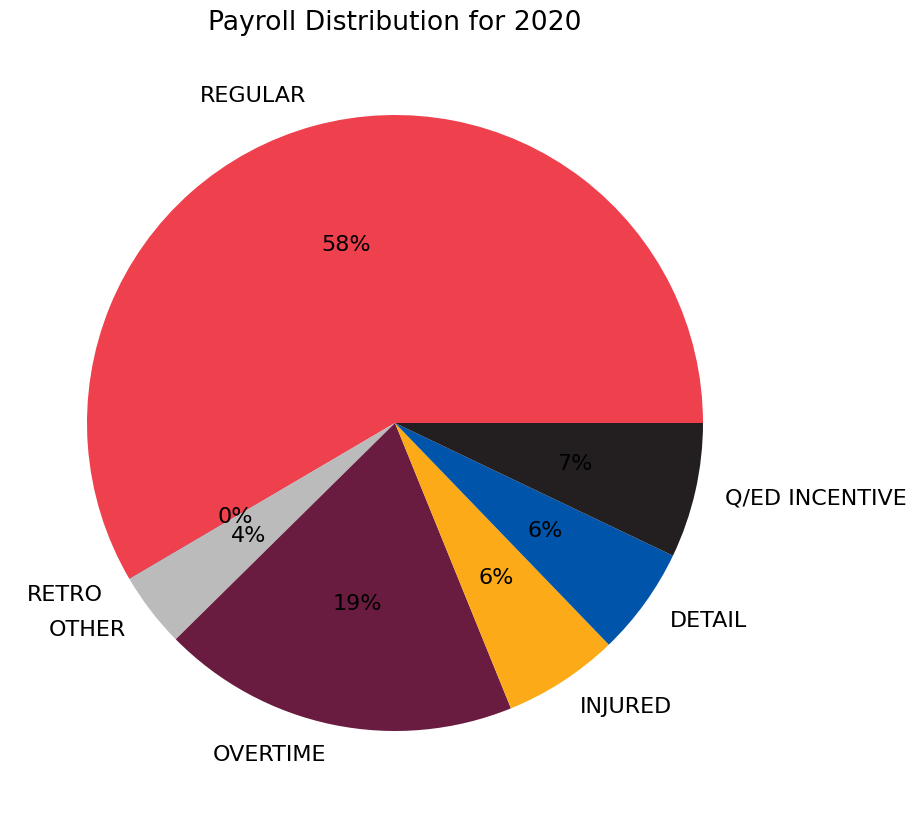

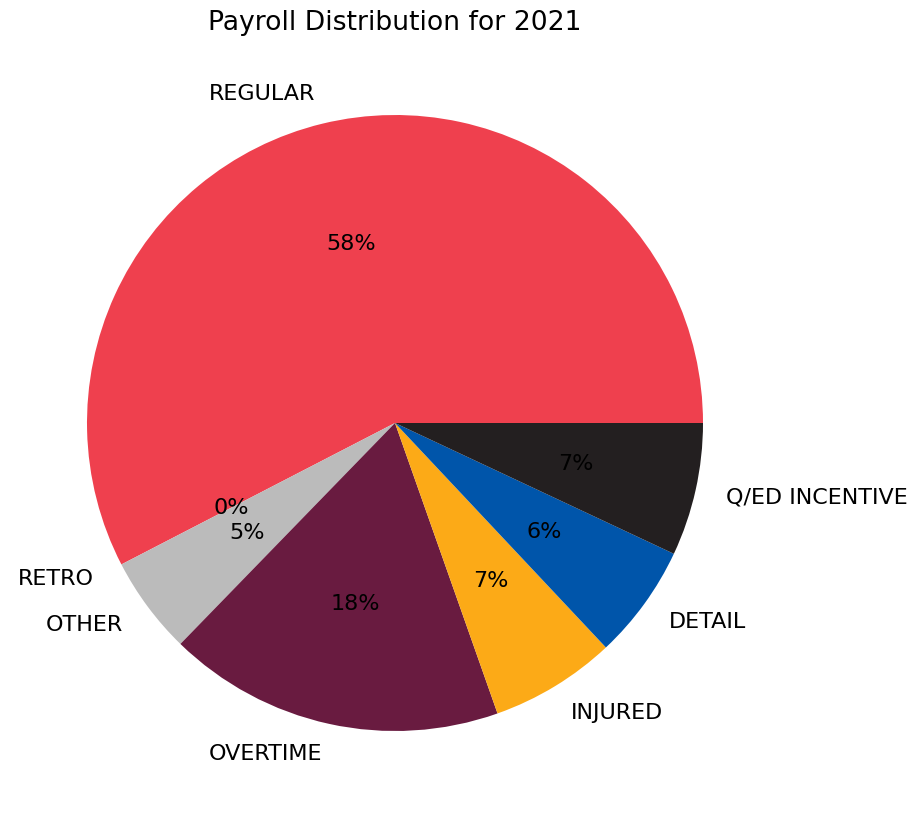

In [8]:
# 10. Payroll Distribution Over Time (base, overtime, retro, detail, etc.)

payroll_df = pd.DataFrame(
    [
        e_20_df_bpd[cols_of_interest].drop(columns=["TOTAL_GROSS"]).sum(),
        e_21_df_bpd[cols_of_interest].drop(columns=["TOTAL_GROSS"]).sum(),
    ],
    index=["2020", "2021"]
)
colors = ["#ef404e", "#130F54", "#bbbbbb", "#691B40", "#FCAA17", "#0055AA", "#231F20"]

payroll_df.rename(columns={"QUINN_EDUCATION_INCENTIVE": "Q/ED INCENTIVE"}, inplace=True)

payroll_20_data = payroll_df.iloc[0].values
payroll_20_labels = payroll_df.columns

plt.pie(payroll_20_data, labels=payroll_20_labels, colors = colors, autopct='%.0f%%')
plt.title("Payroll Distribution for 2020")
plt.show()

payroll_21_data = payroll_df.iloc[1].values
payroll_21_labels = payroll_df.columns

plt.pie(payroll_21_data, labels=payroll_21_labels, colors=colors, autopct='%.0f%%')
plt.title("Payroll Distribution for 2021")
plt.show()

/var/folders/m9/643rgy_12_78_r60rjbsns8c0000gn/T/ipykernel_37414/4234607752.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0', '$200,000', '$400,000', '$600,000', '$800,000', '$1,000,000', '$1,200,000'], fontsize = 12)


<Figure size 2200x1200 with 0 Axes>

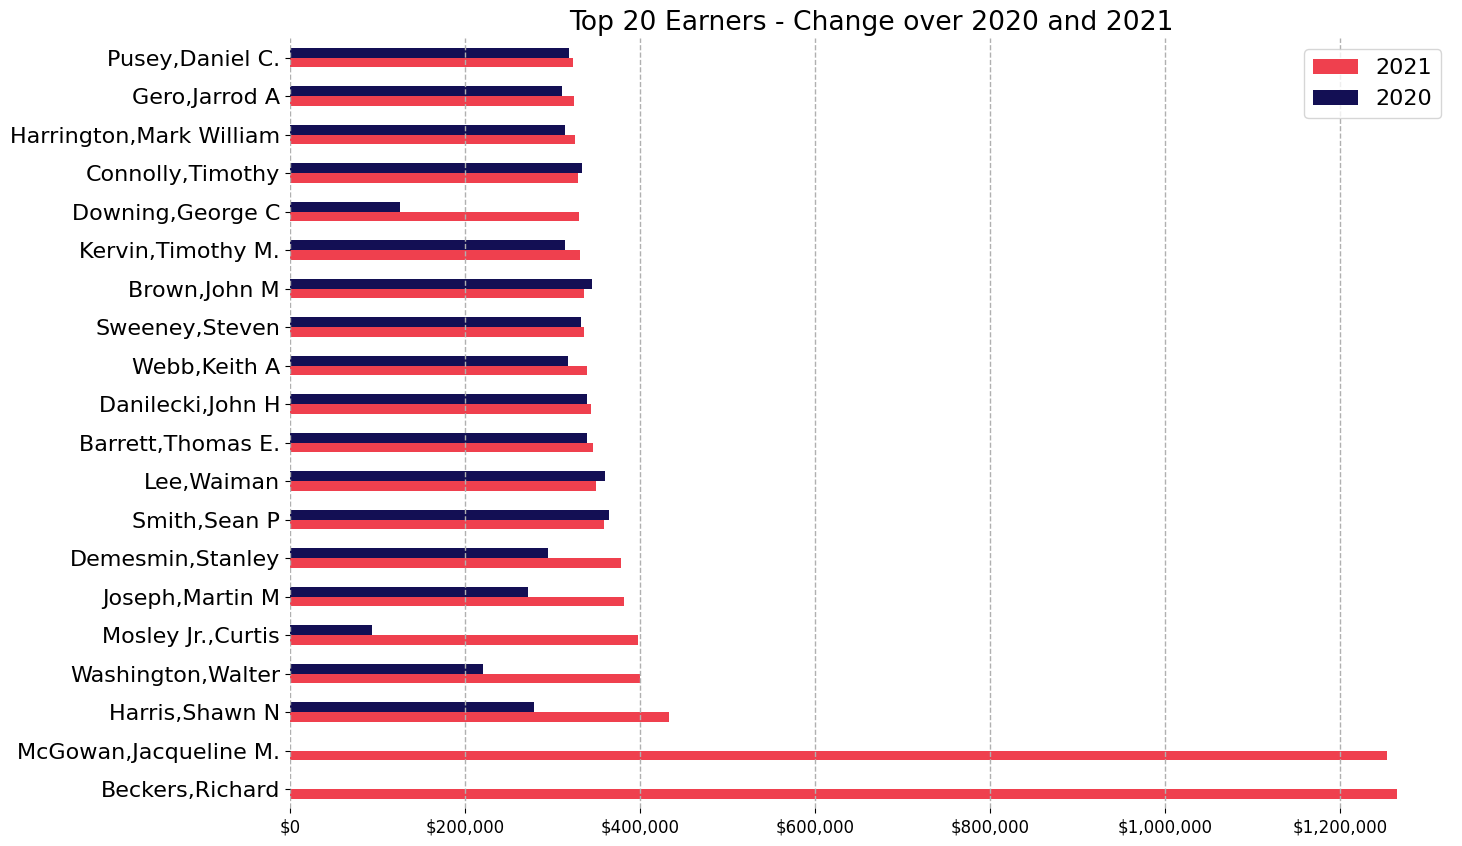

In [9]:
# 11. Top 20 Earners (Change from previous year)

top_20_total_21 = e_21_df_bpd.sort_values(by="TOTAL_GROSS", ascending=False).iloc[:20].reset_index()

same_20_from_21 = list()
for name in top_20_total_21.NAME:
    same_20_from_21.append(e_20_df_bpd[e_20_df_bpd.NAME == name].TOTAL_GROSS.values)
    

same_20_from_21 = pd.DataFrame(same_20_from_21, columns=["TOTAL_GROSS"])
same_20_from_21["NAME"] = top_20_total_21.NAME.values


ot_df = pd.DataFrame(
    [
        top_20_total_21.set_index("NAME").TOTAL_GROSS,
        same_20_from_21.set_index("NAME").TOTAL_GROSS

    ],
    index=["2021", "2020"]
).transpose()

plt.figure(figsize=(22, 12))
ax = ot_df.plot.barh(color=['#ef404e', '#130f54'])
ax.grid(axis='x', linestyle='--')
ax.set_xticklabels(['$0', '$200,000', '$400,000', '$600,000', '$800,000', '$1,000,000', '$1,200,000'], fontsize = 12)

ax.get_yaxis().set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.grid(axis = 'x', linewidth = 1)
plt.title("Top 20 Earners - Change over 2020 and 2021")
# plt.xlabel("Total Gross Salary (in Million USD)")
plt.show()

In [10]:
# 12. Top 20 earners from the most recent year (2021) - (OT, Base, Other)

top_20_base_21 = e_21_df_bpd.sort_values(by="REGULAR", ascending=False).iloc[:20] # Top 20 by base pay (regular)
top_20_ot_21 = e_21_df_bpd.sort_values(by="OVERTIME", ascending=False).iloc[:20] # Top 20 by base pay (Overtime)
top_20_others_21 = e_21_df_bpd.sort_values(by="OTHER", ascending=False).iloc[:20] # Top 20 by base pay (Other)

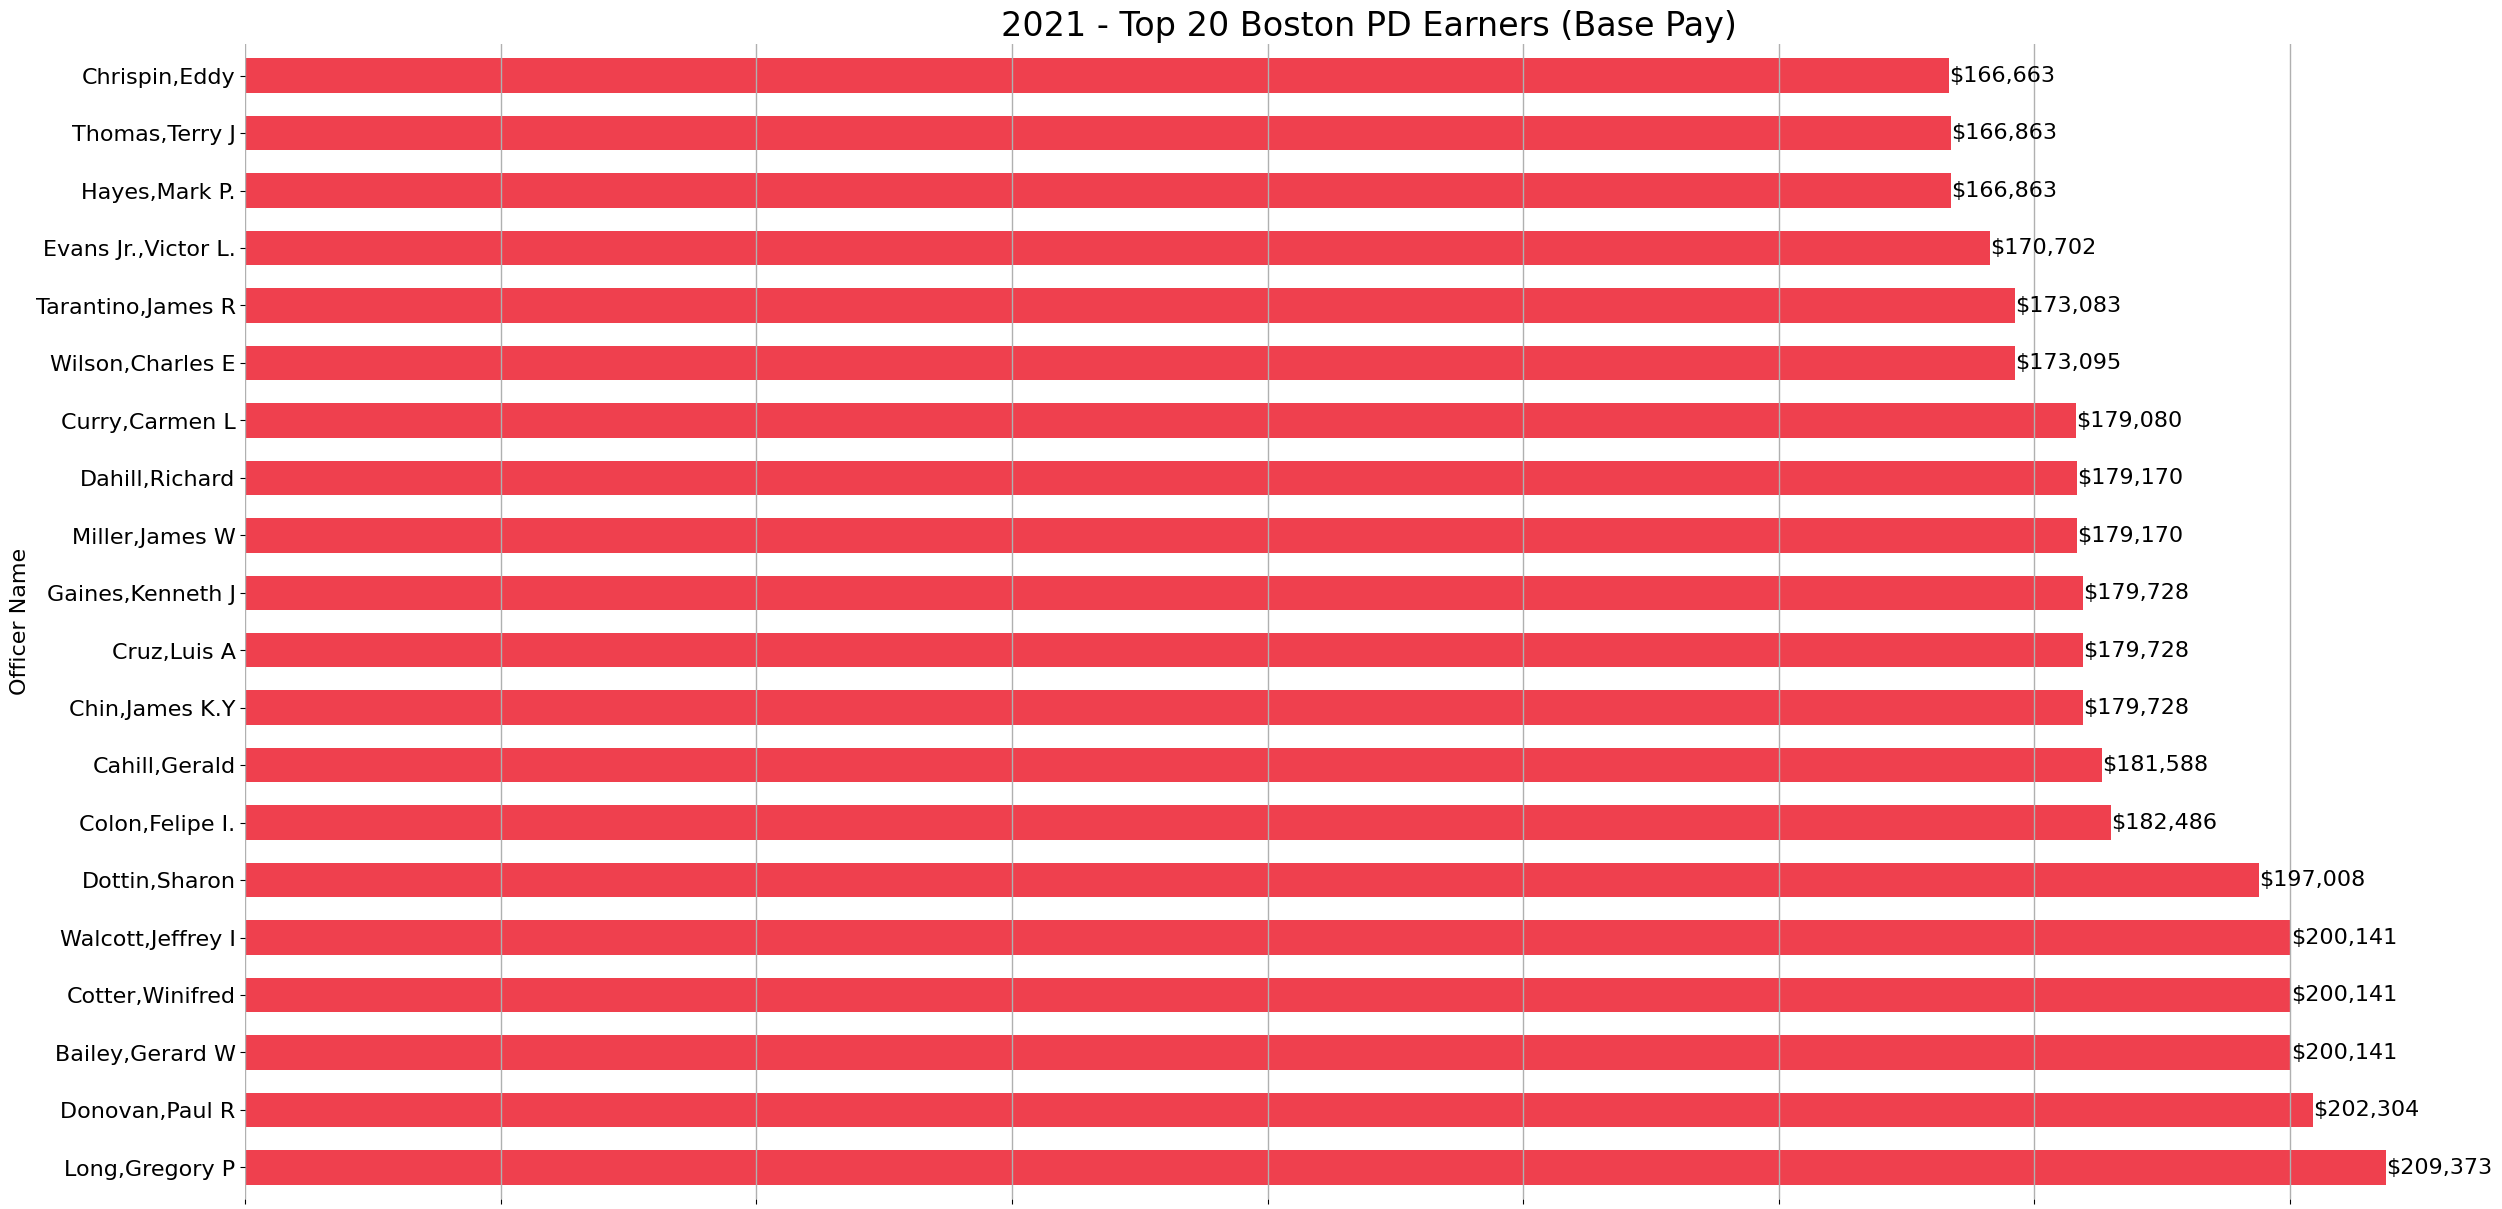

In [11]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(29, 15))
ax = top_20_base_21.set_index("NAME")["REGULAR"].plot.barh(width = 0.6, color=['#ef404e'])
for container in ax.containers:
    ax.bar_label(container, labels=[f'${x:,.0f}' for x in container.datavalues])
ax.set_xticklabels([])

ax.get_yaxis().set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.grid(axis = 'x', linewidth = 1)
plt.title("2021 - Top 20 Boston PD Earners (Base Pay)", fontsize=24)
# plt.xlabel("Earnings (in USD)")
plt.ylabel("Officer Name")
plt.show()

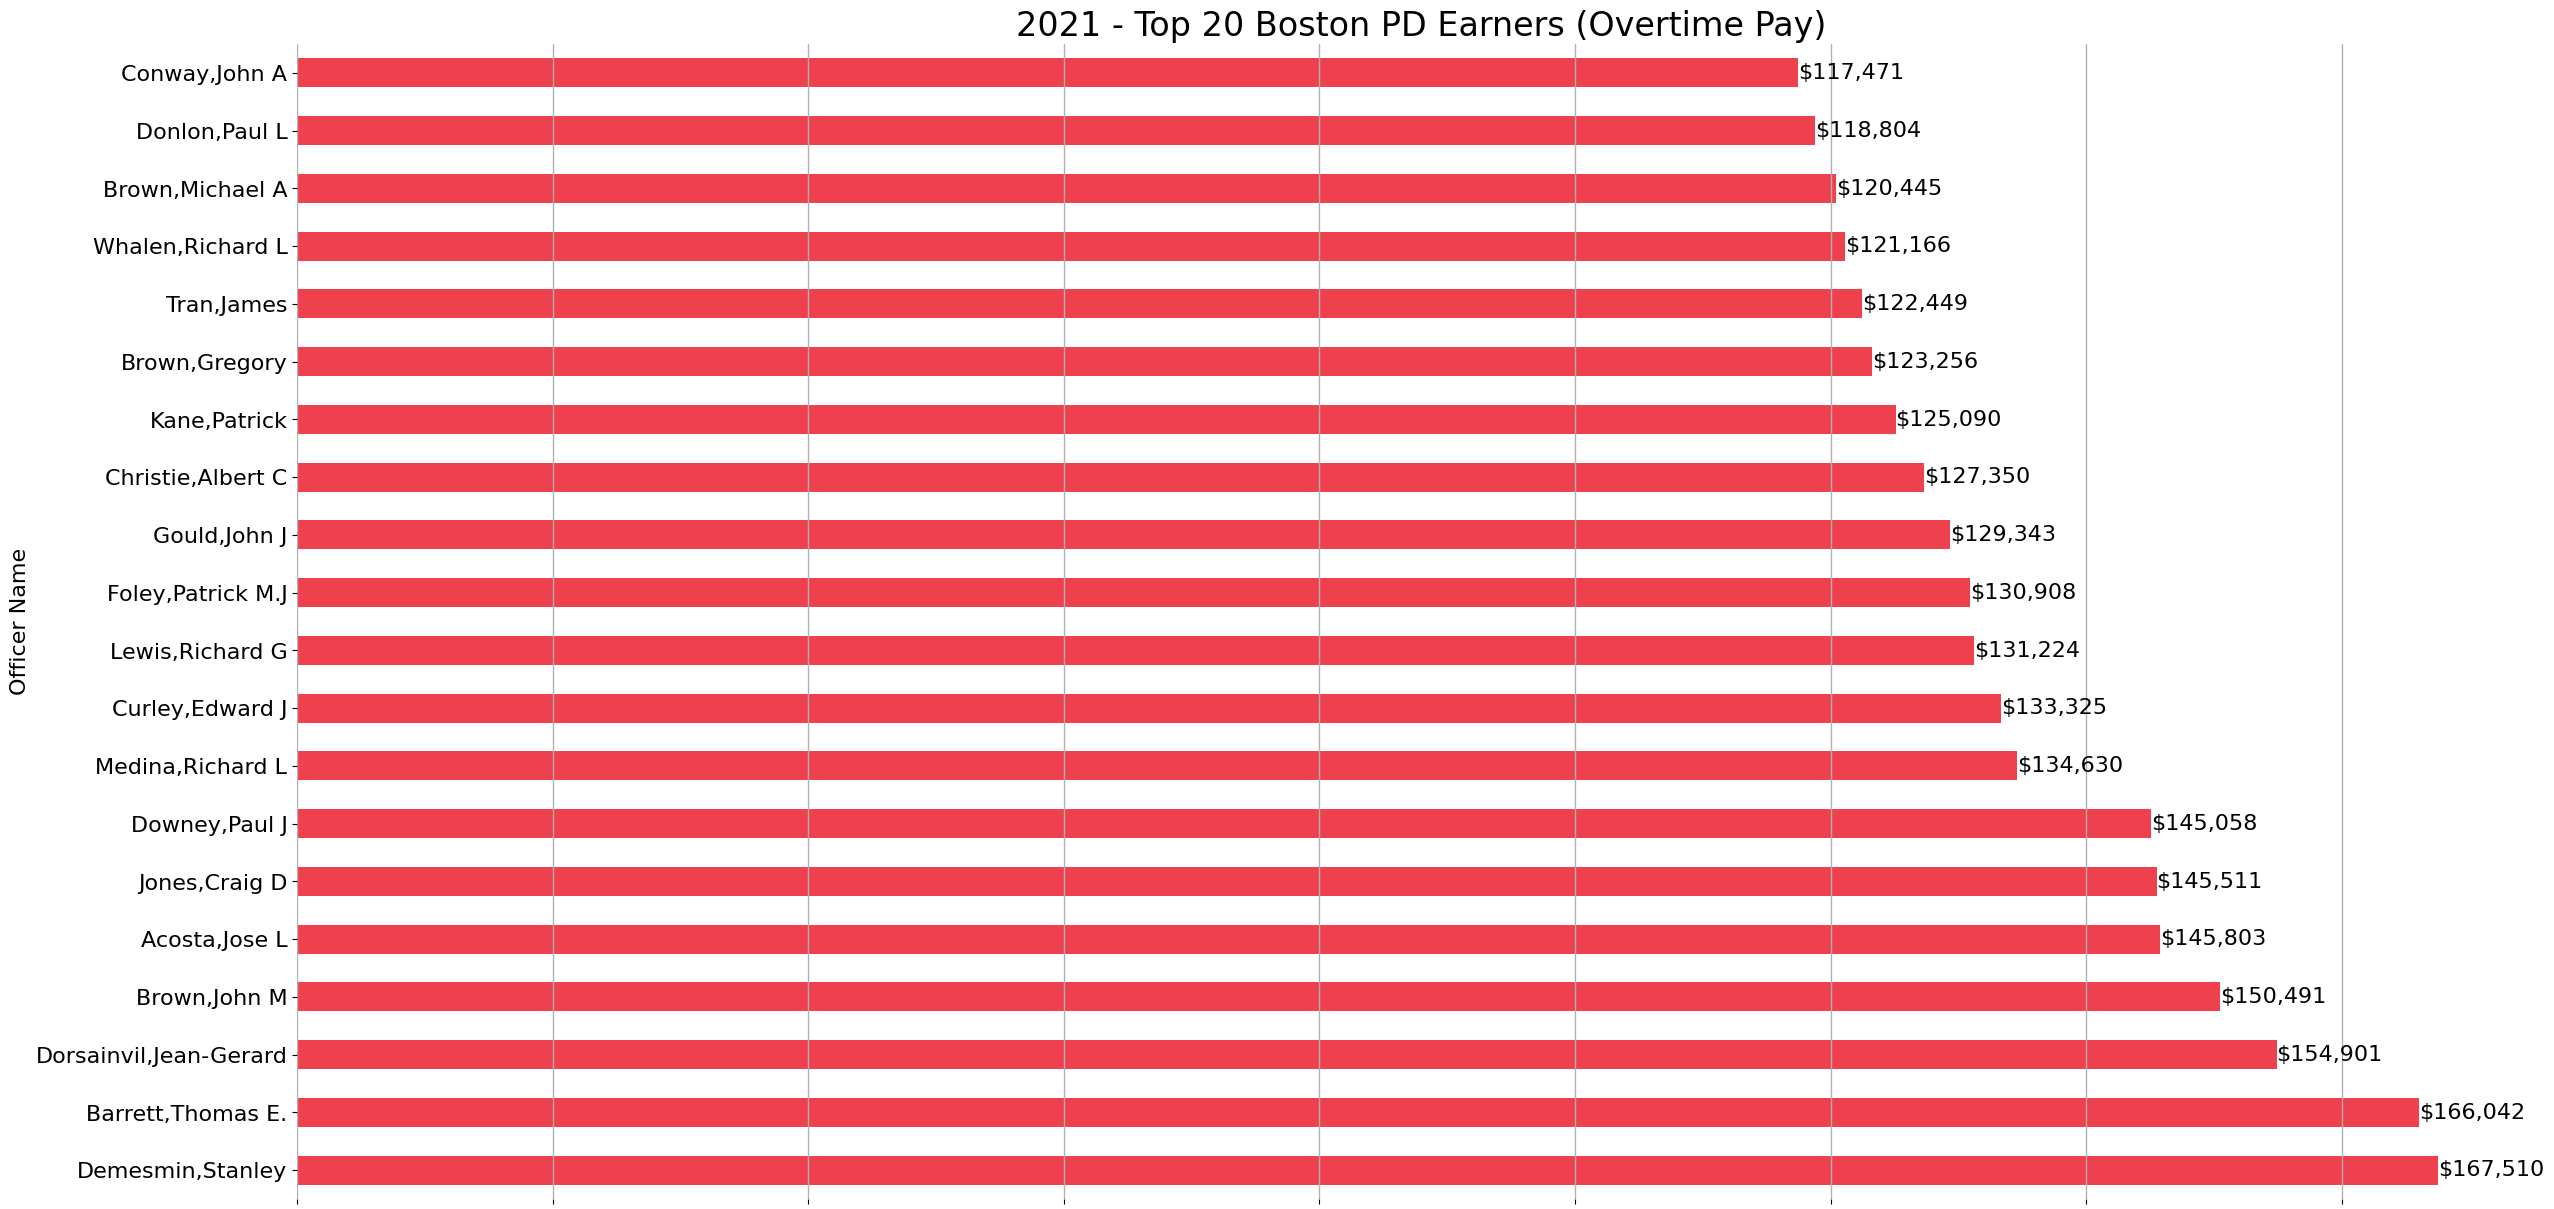

In [12]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(29, 15))
ax = top_20_ot_21.set_index("NAME")["OVERTIME"].plot.barh(color=['#EF404E'])
for container in ax.containers:
    ax.bar_label(container, labels=[f'${x:,.0f}' for x in container.datavalues])
ax.set_xticklabels([])

ax.get_yaxis().set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.grid(axis = 'x', linewidth = 1)
plt.title("2021 - Top 20 Boston PD Earners (Overtime Pay)", fontsize=24)
# plt.xlabel("Earnings (in USD)")
plt.ylabel("Officer Name")
plt.show()

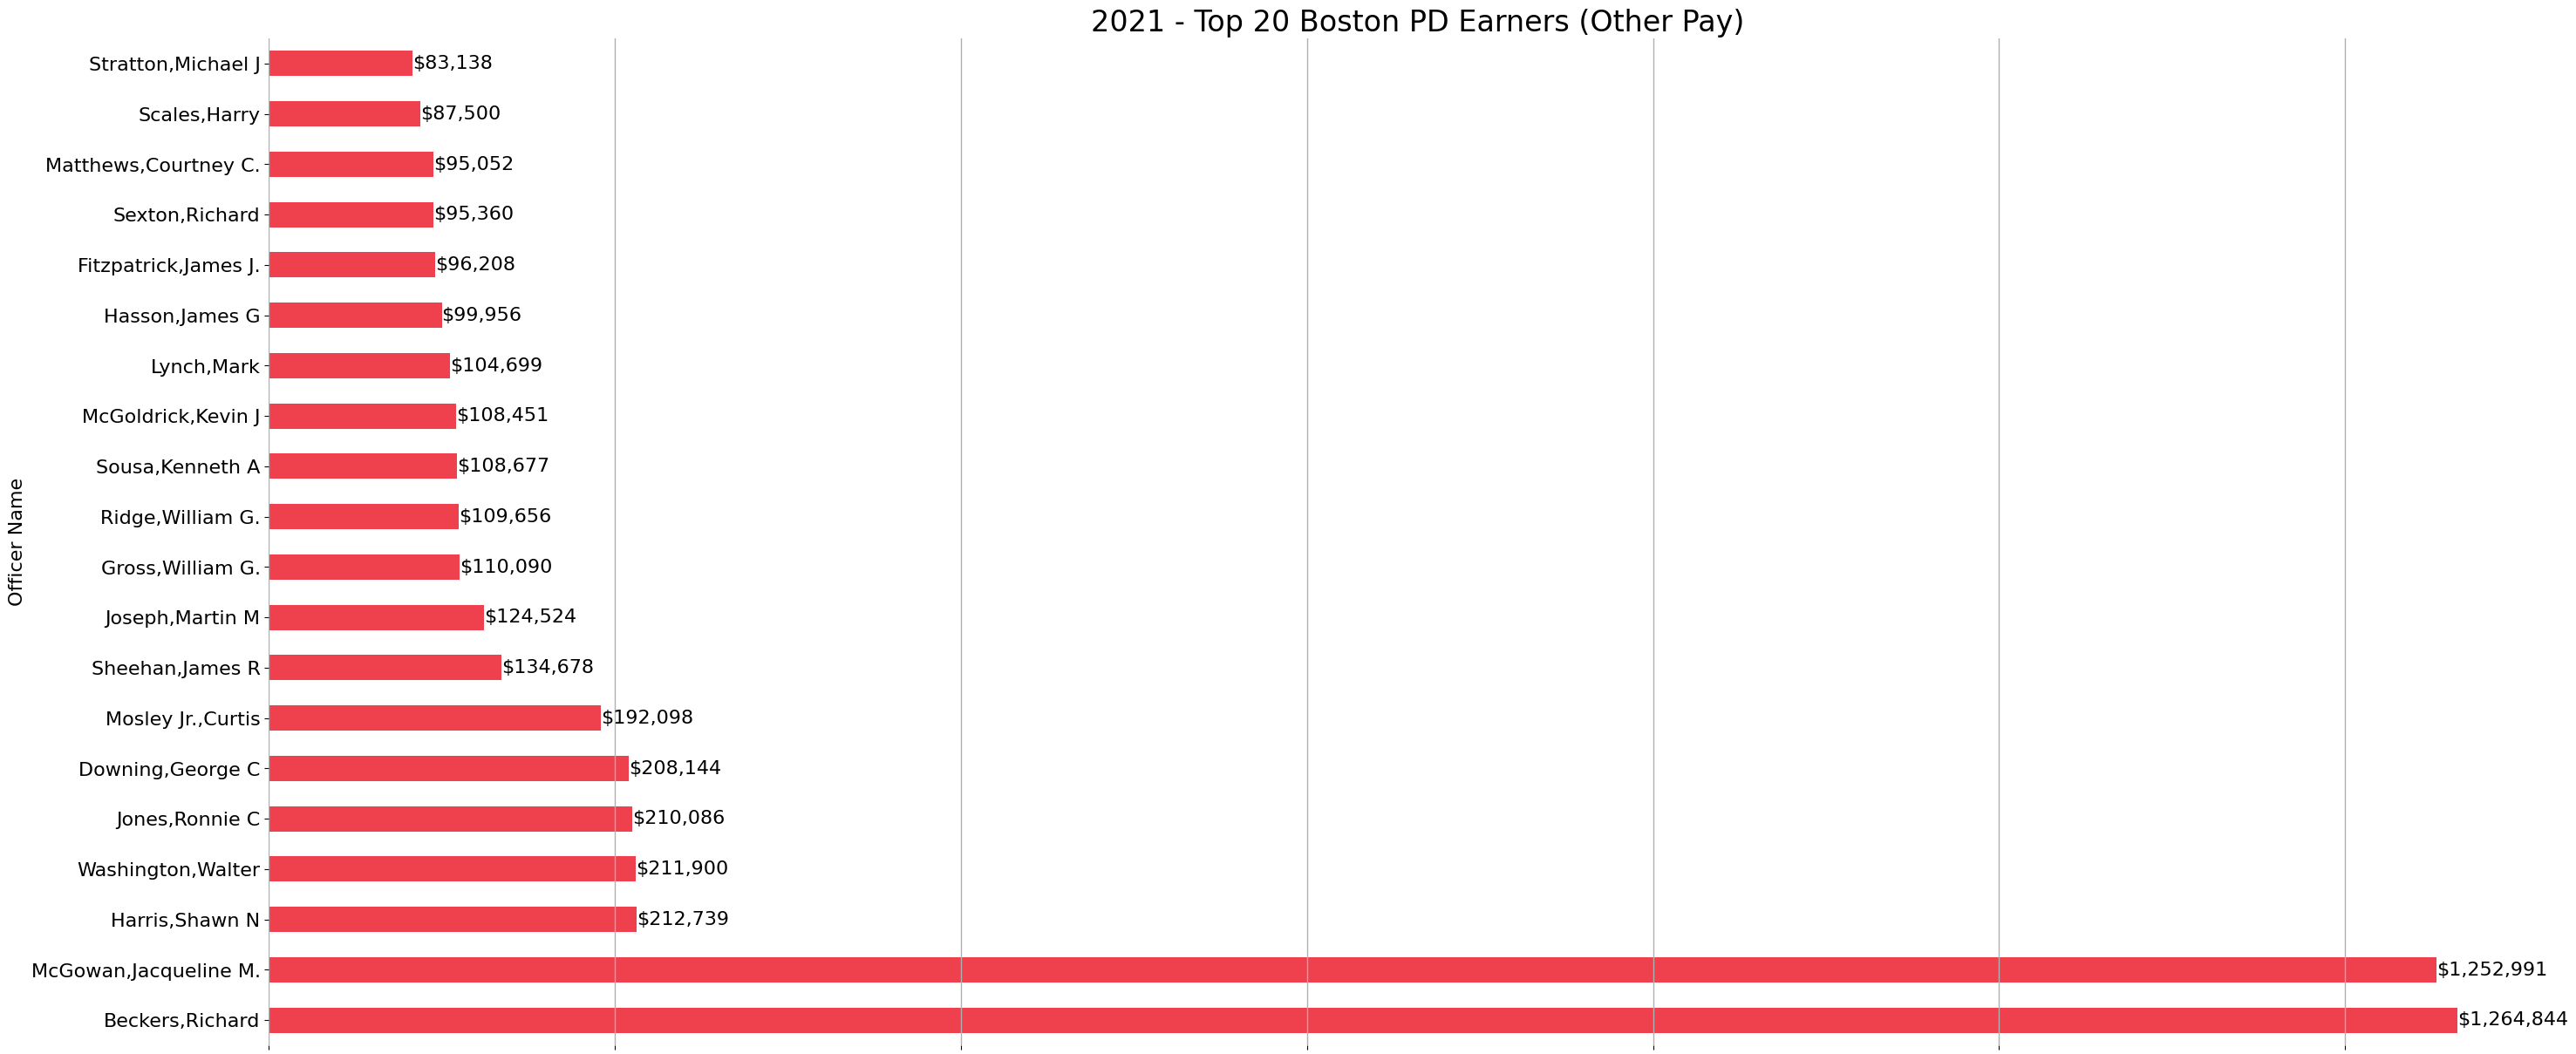

In [13]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(34, 15))
ax = top_20_others_21.set_index("NAME")["OTHER"].plot.barh(color=['#EF404E'])

for container in ax.containers:
    ax.bar_label(container, labels=[f'${x:,.0f}' for x in container.datavalues])
ax.set_xticklabels([])

ax.get_yaxis().set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.grid(axis = 'x', linewidth = 1)
plt.title("2021 - Top 20 Boston PD Earners (Other Pay)", fontsize=24)
# plt.xlabel("Earnings (in Million USD)")
plt.ylabel("Officer Name")
plt.show()

/var/folders/m9/643rgy_12_78_r60rjbsns8c0000gn/T/ipykernel_37414/1918963585.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0', '$50M', '$100M', '$150M', '$200M'])


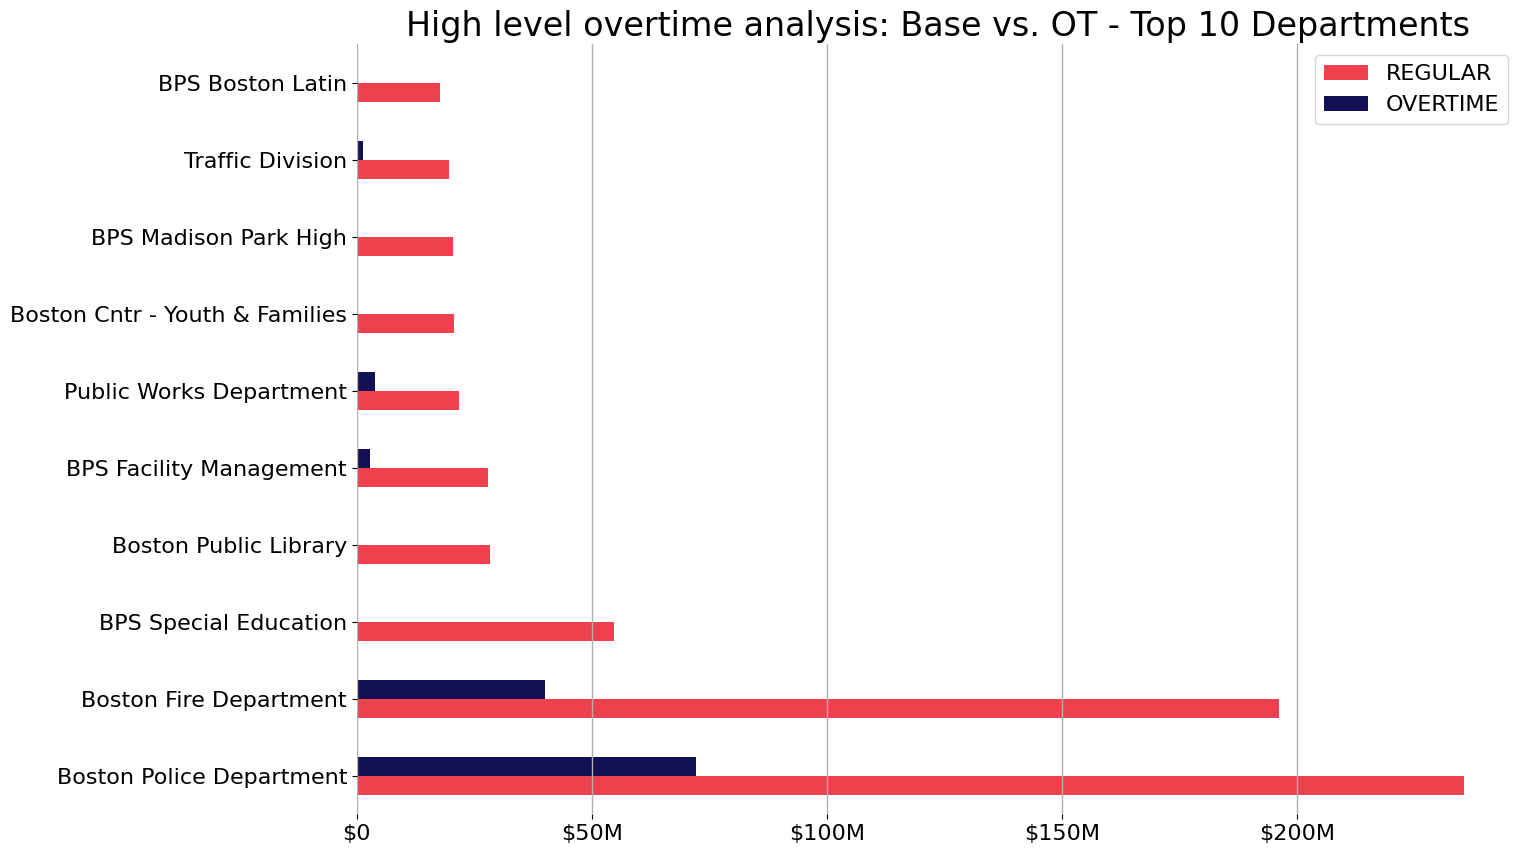

In [14]:
# 13 High level overtime analysis (base salary vs. overtime vs. other departments) 
n = 10
ax = e_21_df.groupby("DEPARTMENT_NAME").sum().sort_values(
    by="REGULAR", ascending=False)[:n][["REGULAR", "OVERTIME"]].plot.barh(color=['#ef404e', '#130F54'])
ax.set_xticklabels(['$0', '$50M', '$100M', '$150M', '$200M'])

ax.get_yaxis().set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.grid(axis = 'x', linewidth = 1)
plt.title(f"High level overtime analysis: Base vs. OT - Top {n} Departments", fontsize=24)
# plt.xlabel("Pay (in 100M USD)")
plt.show()

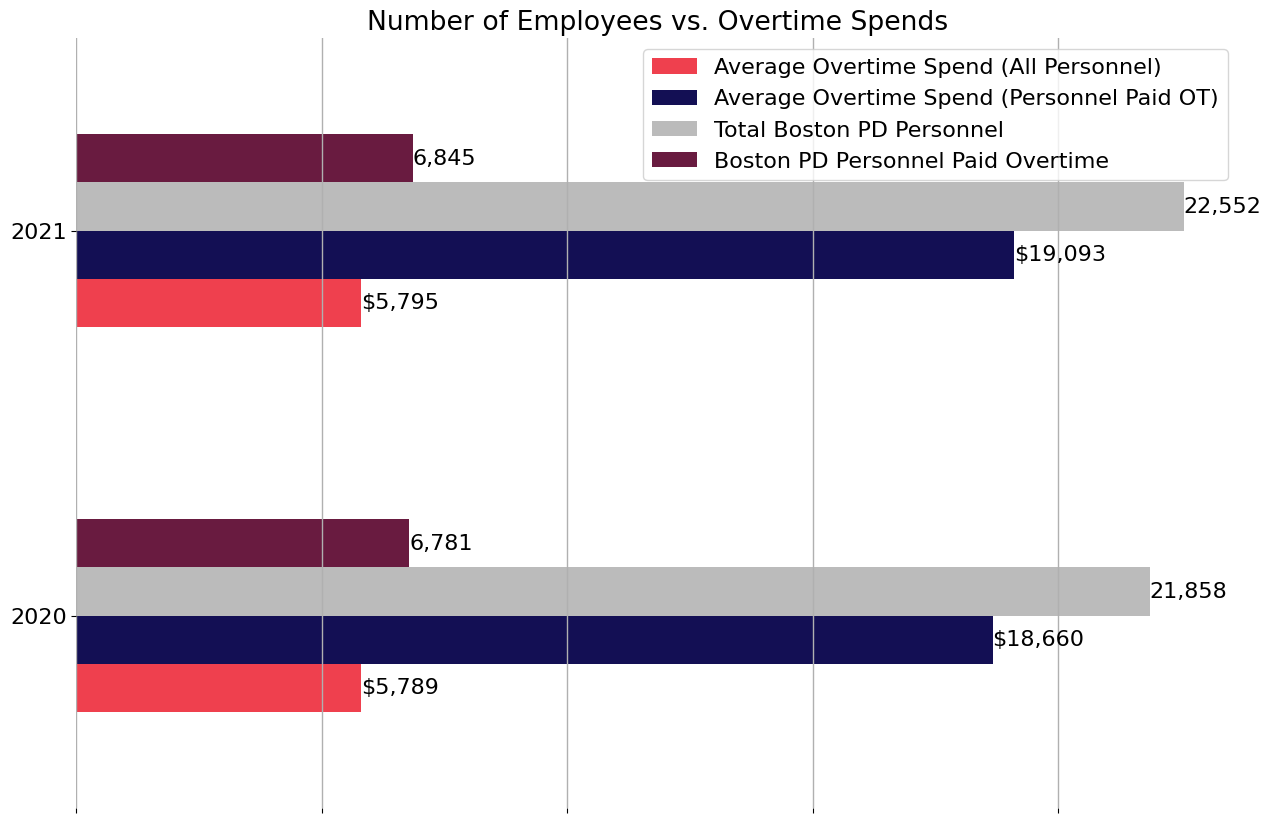

In [15]:
# 14. # of employees vs. OT Spends


yearly_ot_df = pd.DataFrame(
    {
        "Total Overtime Spend": [
            e_20_df.OVERTIME.sum(),
            e_21_df.OVERTIME.sum(),
        ],
        "Average Overtime Spend (All Personnel)": [
            e_20_df.OVERTIME.mean(),
            e_21_df.OVERTIME.mean(),
        ],
        "Average Overtime Spend (Personnel Paid OT)": [
            e_20_df[e_20_df.OVERTIME > 0].OVERTIME.mean(),
            e_21_df[e_21_df.OVERTIME > 0].OVERTIME.mean(),
        ], 
        "Total Boston PD Personnel":
        [
            len(e_20_df),
            len(e_21_df),
        ],
        "Boston PD Personnel Paid Overtime":
        [
            len(e_20_df[e_20_df.OVERTIME > 0]),
            len(e_21_df[e_21_df.OVERTIME > 0]),
        ]
    },
    index=["2020", "2021"]
)

ax = yearly_ot_df.drop(columns=["Total Overtime Spend"]).plot.barh(color=["#EF404E", "#130F54", "#BBBBBB", "#691B40",])
for container in ax.containers[:2]:
    ax.bar_label(container, labels=[f'${x:,.0f}' for x in container.datavalues])
    
for container in ax.containers[2:]:
    ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])

ax.get_yaxis().set_label_text("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.grid(axis = 'x', linewidth = 1)
plt.title("Number of Employees vs. Overtime Spends")
ax.set_xticklabels([])
# plt.xlabel("Number of Employees or Overtime Pay in USD")
# plt.ylabel("YEAR")
plt.show()